In [9]:
import matplotlib.pyplot as plt

# for reloading of modules
import importlib
from helpers import bohmian_integrator
from helpers import logging, physics_1d_sim_with_damping, plotting_spin, video_spin, data
from helpers import bohmian_plotter

def reload_modules():
	importlib.reload(logging)
	
	importlib.reload(physics_1d_sim_with_damping)

# Call this whenever you need to reload the modules
reload_modules()

# Then your regular imports
from helpers.logging import *
from helpers.physics_1d_sim_with_damping import *

## Single Bounce Focus

eta: 2000.0, n: 2


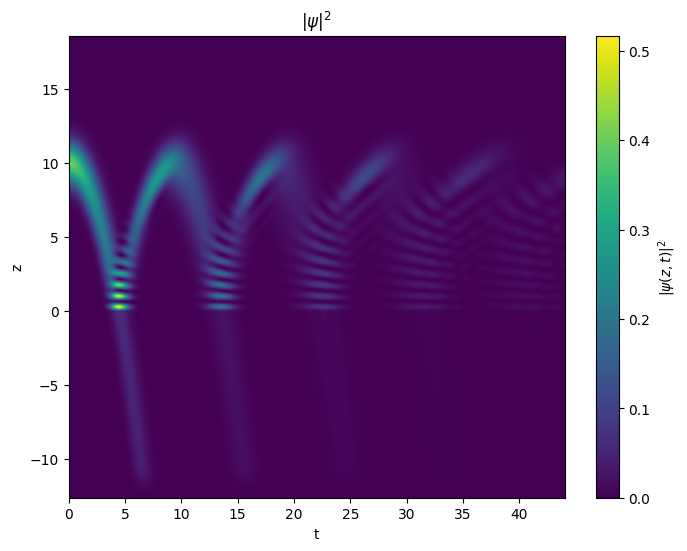

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ------------------
# 1) Constants & Setup
# ------------------
hbar = 1.0
m = 1.0
g = 9.81

# Example usage: delta barrier
barrier_params_delta = {'z0': 0.0, 'alpha': 5.0}
params = {
	"n_steps":44000,
	"dt":0.001,
	"x_min":-40, "x_max":40, "Nx":512*2*2,

	#
	"barrier_type": 'delta',
	"barrier_params": barrier_params_delta,

	# absorbing potential
	"absorber_type": "poly_cap",
	"absorber_params": dict(width=30, n=2, eta=2000.0), # eta = strength, n = polynomial steepness

	# initial wave function
	"z0_packet": 10.0,
	"p0_packet": 0.0
}
z_array, t_vals, prob_arr, loss, psi_history, V_tot  = simulate_n(**params)

# Now plot the spacetime density
plot_spacetime(prob_arr[:, 700:1500], z_array[700:1500], t_vals[:], title="$|\psi|^2$", log_scale=True)

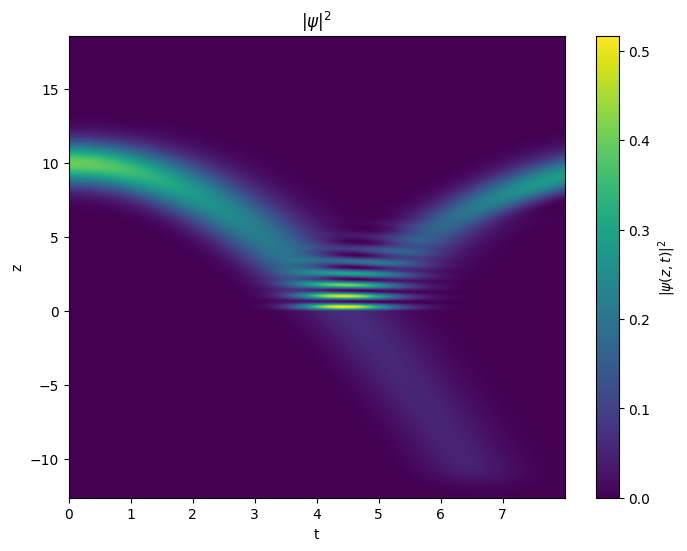

In [7]:
plot_spacetime(prob_arr[:8000, 700:1500], z_array[700:1500], t_vals[:8000], title="$|\psi|^2$", log_scale=True)

In [10]:
create_quantum_evolution_video(
    prob_arr=prob_arr,  # Your probability array
    z_array=z_array,      # Your spatial grid
    t_vals=t_vals,  # Your time values
    output_filename='quantum_evolution_1d.mp4',
    z_range=(-15, 15),  # Optional: focus on specific z range
    t_range=(0, 20),     # Optional: focus on specific time range
    fps=30,
    dpi=150,
    log_scale=False
)